In [ ]:
!pip install geopandas
!pip install pandas
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 4.8 MB/s 
     |████████████████████████████████| 16.6 MB 48.5 MB/s 
     |████████████████████████████████| 7.8 MB 52.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import geopandas as gpd


%matplotlib inline

In [ ]:
distritos = gpd.read_file('distritos-peru.shp') 
distritos


,ccdd,nombdep,ccpp,nombprov,ccdi,nombdist,capital,ubigeo,idprov,codigo,cnt_ccpp,descripcio,poblacion,fecha,dat_pob,geometry
0,06,CAJAMARCA,11,SAN MIGUEL,05,EL PRADO,EL PRADO,061105,0611,061105,15.0,EL PRADO,1661.0,2020.0,INEI,"POLYGON ((-79.01679 -6.96945, -79.01581 -6.969..."
1,06,CAJAMARCA,11,SAN MIGUEL,09,NIEPOS,NIEPOS,061109,0611,061109,41.0,NIEPOS,3381.0,2020.0,INEI,"POLYGON ((-79.21691 -6.85171, -79.21576 -6.851..."
2,14,LAMBAYEQUE,01,CHICLAYO,06,LA VICTORIA,LA VICTORIA,140106,1401,140106,28.0,LA VICTORIA,97701.0,2020.0,INEI,"POLYGON ((-79.83314 -6.78666, -79.83225 -6.790..."
3,14,LAMBAYEQUE,01,CHICLAYO,15,SAÃÂA,SAÃÂA,140115,1401,140115,35.0,SAÃÂA,12910.0,2020.0,INEI,"POLYGON ((-79.58359 -6.77662, -79.58181 -6.777..."
4,15,LIMA,09,OYON,02,ANDAJES,ANDAJES,150902,1509,150902,27.0,ANDAJES,653.0,2020.0,INEI,"POLYGON ((-76.90593 -10.66744, -76.90616 -10.6..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1870,04,AREQUIPA,03,CARAVELI,12,QUICACHA,QUICACHA,040312,0403,040312,26.0,QUICACHA,2006.0,2020.0,INEI,"POLYGON ((-73.86404 -15.32470, -73.86297 -15.3..."
1871,04,AREQUIPA,04,CASTILLA,03,AYO,AYO,040403,0404,040403,5.0,AYO,270.0,2020.0,INEI,"POLYGON ((-72.21807 -15.52728, -72.21720 -15.5..."
1872,04,AREQUIPA,04,CASTILLA,04,CHACHAS,CHACHAS,040404,0404,040404,19.0,CHACHAS,1813.0,2020.0,INEI,"POLYGON ((-71.95148 -14.83836, -71.95157 -14.8..."
1873,04,AREQUIPA,04,CASTILLA,05,CHILCAYMARCA,CHILCAYMARCA,040405,0404,040405,24.0,CHILCAYMARCA,1031.0,2020.0,INEI,"POLYGON ((-72.37490 -15.24990, -72.37494 -15.2..."


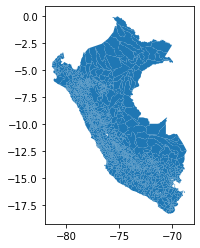

In [ ]:
distritos.plot()

In [ ]:
distritos1=distritos[['ubigeo','nombdep','nombprov','nombdist']]
distritos1['ubigeo_inei']=distritos1['ubigeo'].astype(np.int64)
distritos1.dtypes

<ipython-input-11-14bbdd1756ed>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  distritos1['ubigeo_inei']=distritos1['ubigeo'].astype(np.int64)


ubigeo         object
nombdep        object
nombprov       object
nombdist       object
ubigeo_inei     int64
dtype: object

In [ ]:
#Cargando la base de Centros de Vacunación
base_covid_vacuna = pd.read_csv('TB_CENTRO_VACUNACION.csv', sep=',') #,index_col='Unnamed: 0'
base_covid_vacuna.dtypes

id_centro_vacunacion      int64
id_ubigeo                 int64
nombre                   object
latitud                 float64
longitud                float64
entidad_administra       object
id_eess                   int64
dtype: object

In [ ]:
#Cargando la base de Centros de Vacunación
distrito_f = pd.read_csv('distritos_peru1.csv', sep=',', encoding='latin-1') #,index_col='Unnamed: 0'
distrito_f.dtypes
distrito_f1=distrito_f.loc[:,['LATITUD_1','LONGITUD_1','ubigeo_inei','LATITUD_CAP','LONGITUD_CAP']]
distrito_f1

,LATITUD_1,LONGITUD_1,ubigeo_inei,LATITUD_CAP,LONGITUD_CAP
0,-7.038042,-79.003317,61105,-7.16378,-78.50027
1,-6.926715,-79.131432,61109,-7.16378,-78.50027
2,-6.823756,-79.861147,140106,-6.70111,-79.90611
3,-6.887142,-79.637997,140115,-6.70111,-79.90611
4,-10.777603,-76.927150,150902,-12.04318,-77.02824
...,...,...,...,...,...
1870,-15.567361,-73.730380,40312,-16.39889,-71.53500
1871,-15.640957,-72.285089,40403,-16.39889,-71.53500
1872,-15.182138,-72.116192,40404,-16.39889,-71.53500
1873,-15.350621,-72.385276,40405,-16.39889,-71.53500


In [ ]:
#Cargando la base de Centros de Vacunación
base_ubigeos = pd.read_csv('TB_UBIGEOS.csv', sep=',') #,index_col='Unnamed: 0'
base_ubigeos.dtypes

id_ubigeo              int64
ubigeo_reniec        float64
ubigeo_inei            int64
departamento_inei      int64
departamento          object
provincia_inei         int64
provincia             object
distrito              object
region                object
macroregion_inei      object
macroregion_minsa     object
iso_3166_2            object
fips                   int64
superficie           float64
altitud              float64
latitud              float64
longitud             float64
dtype: object

In [ ]:
base_covid_vacuna

,id_centro_vacunacion,id_ubigeo,nombre,latitud,longitud,entidad_administra,id_eess
0,557,993,"Estacionamiento Del Centro Comercial ""el Quind...",-14.074283,-75.739709,C.S. LOS AQUIJES,0
1,558,993,Estacionamiento Del Centro Comercial Plaza Sol,-14.069467,-75.727896,C.S. LA PALMA,0
2,559,995,Ie 22511,-14.114718,-75.675898,C.S. LOS AQUIJES,0
3,560,998,Ie. Victor Manuel Maurtua,-14.048166,-75.707636,C.S. PARCONA,0
4,561,1000,Primera Loza De La Expansión Urbana,-13.969434,-75.772475,C.S. SAN JUAN BAUTISTA,0
...,...,...,...,...,...,...,...
32858,5640,1762,I.E JOSE HERACLIDES VELA VASQUEZ,-7.071450,-76.718970,NaN,0
32859,5641,1762,I.E VICENTE CARDENAS ANGULO,-7.070650,-76.713050,NaN,0
32860,5642,1762,I.E. 095,-7.071160,-76.714830,NaN,0
32861,5643,1762,I.E. 0028,-7.071160,-76.714830,NaN,0


In [ ]:
base_covid_vacuna.shape

(32863, 7)

In [ ]:
base_ubigeos
base_ubigeos1=base_ubigeos[['id_ubigeo','ubigeo_inei']]
base_ubigeos1=pd.merge(base_ubigeos1,distrito_f1, on='ubigeo_inei')
base_ubigeos1

,id_ubigeo,ubigeo_inei,LATITUD_1,LONGITUD_1,LATITUD_CAP,LONGITUD_CAP
0,1,10101,-6.247743,-77.856488,-6.22944,-77.87250
1,2,10102,-5.996133,-77.743204,-6.22944,-77.87250
2,3,10103,-6.807726,-77.949166,-6.22944,-77.87250
3,4,10104,-6.297970,-77.677166,-6.22944,-77.87250
4,5,10105,-6.078208,-77.755866,-6.22944,-77.87250
...,...,...,...,...,...,...
1870,1847,240102,-3.599577,-80.503013,-3.56694,-80.45153
1871,1848,240103,-3.671745,-80.566401,-3.56694,-80.45153
1872,1849,240104,-3.851749,-80.356358,-3.56694,-80.45153
1873,1850,240105,-3.905938,-80.510913,-3.56694,-80.45153


In [ ]:
base_covid_vacuna=pd.merge(base_covid_vacuna,base_ubigeos1, on='id_ubigeo')
base_covid_vacuna.dtypes

id_centro_vacunacion      int64
id_ubigeo                 int64
nombre                   object
latitud                 float64
longitud                float64
entidad_administra       object
id_eess                   int64
ubigeo_inei               int64
LATITUD_1               float64
LONGITUD_1              float64
LATITUD_CAP             float64
LONGITUD_CAP            float64
dtype: object

In [ ]:
base_covid_vacuna=pd.merge(base_covid_vacuna,distritos1, on='ubigeo_inei')
base_covid_vacuna

,id_centro_vacunacion,id_ubigeo,nombre,latitud,longitud,entidad_administra,id_eess,ubigeo_inei,LATITUD_1,LONGITUD_1,LATITUD_CAP,LONGITUD_CAP,ubigeo,nombdep,nombprov,nombdist
0,557,993,"Estacionamiento Del Centro Comercial ""el Quind...",-14.074283,-75.739709,C.S. LOS AQUIJES,0,110101,-14.213856,-75.906656,-14.06777,-75.72861,110101,ICA,ICA,ICA
1,558,993,Estacionamiento Del Centro Comercial Plaza Sol,-14.069467,-75.727896,C.S. LA PALMA,0,110101,-14.213856,-75.906656,-14.06777,-75.72861,110101,ICA,ICA,ICA
2,767,993,Colegio 23007 Judith Aybar De Granados,-14.058436,-75.730435,C.S. LA PALMA,0,110101,-14.213856,-75.906656,-14.06777,-75.72861,110101,ICA,ICA,ICA
3,768,993,"Polideportivo Club Del Pueblo ""vacunacar""",-14.077971,-75.731405,HOSPITAL FELIX TORREALVA,0,110101,-14.213856,-75.906656,-14.06777,-75.72861,110101,ICA,ICA,ICA
4,103356,993,REGIONAL DE ICA,-14.073575,-75.743367,NaN,3356,110101,-14.213856,-75.906656,-14.06777,-75.72861,110101,ICA,ICA,ICA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32858,107452,1431,HONGOS,-12.810727,-75.765278,NaN,7452,151012,-12.766494,-75.672838,-12.04318,-77.02824,151012,LIMA,YAUYOS,HONGOS
32859,2452,1431,MUNICIPIO DE HONGOS,-12.767086,-75.678990,NaN,0,151012,-12.766494,-75.672838,-12.04318,-77.02824,151012,LIMA,YAUYOS,HONGOS
32860,3979,1431,FRONTIS DEL ESTABLECIMIENTO,-12.748436,-75.671273,DIRESA LIMA,0,151012,-12.766494,-75.672838,-12.04318,-77.02824,151012,LIMA,YAUYOS,HONGOS
32861,125927,492,PUESTO DE SALUD ORONCCOY,-13.380121,-73.435714,NaN,25927,50511,-13.346327,-73.392609,-13.15878,-74.22321,050511,AYACUCHO,LA MAR,ORONCCOY


In [ ]:
base_covid_vacuna['CANT']=1
base_covid_vacuna

,id_centro_vacunacion,id_ubigeo,nombre,latitud,longitud,entidad_administra,id_eess,ubigeo_inei,LATITUD_1,LONGITUD_1,LATITUD_CAP,LONGITUD_CAP,ubigeo,nombdep,nombprov,nombdist,CANT
0,557,993,"Estacionamiento Del Centro Comercial ""el Quind...",-14.074283,-75.739709,C.S. LOS AQUIJES,0,110101,-14.213856,-75.906656,-14.06777,-75.72861,110101,ICA,ICA,ICA,1
1,558,993,Estacionamiento Del Centro Comercial Plaza Sol,-14.069467,-75.727896,C.S. LA PALMA,0,110101,-14.213856,-75.906656,-14.06777,-75.72861,110101,ICA,ICA,ICA,1
2,767,993,Colegio 23007 Judith Aybar De Granados,-14.058436,-75.730435,C.S. LA PALMA,0,110101,-14.213856,-75.906656,-14.06777,-75.72861,110101,ICA,ICA,ICA,1
3,768,993,"Polideportivo Club Del Pueblo ""vacunacar""",-14.077971,-75.731405,HOSPITAL FELIX TORREALVA,0,110101,-14.213856,-75.906656,-14.06777,-75.72861,110101,ICA,ICA,ICA,1
4,103356,993,REGIONAL DE ICA,-14.073575,-75.743367,NaN,3356,110101,-14.213856,-75.906656,-14.06777,-75.72861,110101,ICA,ICA,ICA,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32858,107452,1431,HONGOS,-12.810727,-75.765278,NaN,7452,151012,-12.766494,-75.672838,-12.04318,-77.02824,151012,LIMA,YAUYOS,HONGOS,1
32859,2452,1431,MUNICIPIO DE HONGOS,-12.767086,-75.678990,NaN,0,151012,-12.766494,-75.672838,-12.04318,-77.02824,151012,LIMA,YAUYOS,HONGOS,1
32860,3979,1431,FRONTIS DEL ESTABLECIMIENTO,-12.748436,-75.671273,DIRESA LIMA,0,151012,-12.766494,-75.672838,-12.04318,-77.02824,151012,LIMA,YAUYOS,HONGOS,1
32861,125927,492,PUESTO DE SALUD ORONCCOY,-13.380121,-73.435714,NaN,25927,50511,-13.346327,-73.392609,-13.15878,-74.22321,050511,AYACUCHO,LA MAR,ORONCCOY,1


In [ ]:
#Identificamos volumen de centros de vacunacion por departamento
base_vacuna_dep = base_covid_vacuna.groupby(['nombdep','LATITUD_CAP','LONGITUD_CAP']).agg( {'CANT': 'sum'}).reset_index()
base_vacuna_dep.sort_values('CANT', ascending=False)

,nombdep,LATITUD_CAP,LONGITUD_CAP,CANT
14,LIMA,-12.04318,-77.02824,11387
5,CAJAMARCA,-7.16378,-78.50027,1741
19,PIURA,-5.19449,-80.63282,1640
3,AREQUIPA,-16.39889,-71.53500,1569
7,CUSCO,-13.52264,-71.96734,1374
11,JUNIN,-11.15895,-75.99304,1355
1,ANCASH,-9.52779,-77.52778,1251
6,CALLAO,-12.05659,-77.11814,1192
21,SAN MARTIN,-6.51389,-76.74080,1168
20,PUNO,-14.14548,-75.70767,1136


In [ ]:
#Identificamos volumen de centros de vacunacion por distrito
base_vacuna_dist = base_covid_vacuna.groupby(['LATITUD_1','LONGITUD_1','nombdist','ubigeo']).agg( {'CANT': 'sum'}).reset_index()
base_vacuna_dist.sort_values('CANT', ascending=False)

,LATITUD_1,LONGITUD_1,nombdist,ubigeo,CANT
874,-11.945947,-76.971464,SAN JUAN DE LURIGANCHO,150132,1010
866,-11.972519,-77.074378,LOS OLIVOS,150117,791
849,-12.032663,-76.877326,ATE,150103,561
807,-12.120793,-77.029088,MIRAFLORES,150122,551
805,-12.127226,-76.984519,SANTIAGO DE SURCO,150140,537
...,...,...,...,...,...
329,-14.283503,-73.589583,SAN PEDRO DE LARCAY,050908,1
1487,-6.950421,-79.846959,ETEN PUERTO,140104,1
1505,-6.880746,-79.904260,SANTA ROSA,140114,1
302,-14.465819,-73.981786,CARMEN SALCEDO,050604,1


In [ ]:
base_covid_vacuna['entidad_administra']=base_covid_vacuna['entidad_administra'].fillna('OTROS')
base_covid_vacuna['entidad_administra'].value_counts()

OTROS                                                      30798
MINSA                                                       1228
DIRESA                                                       624
ESSALUD                                                       81
DIRESA LIMA                                                   63
PRIVADO                                                       12
C.S. LOS AQUIJES                                               3
C.S. LA PALMA                                                  2
C.S. PUEBLO NUEVO                                              2
C.S. SAN CLEMENTE                                              2
LIMA SUR                                                       2
SISOL                                                          2
C.S. OCUCAJE                                                   2
C.S. EL INGENIO                                                2
LIMA NORTE                                                     1
C.S. CHANGUILLO          

In [ ]:
condiciones = [((base_covid_vacuna['entidad_administra']=='OTROS')&(base_covid_vacuna['nombre'].str.contains('HOSPITAL')))|(base_covid_vacuna['entidad_administra'].str.contains('HOSPITAL'))|(base_covid_vacuna['entidad_administra'].str.contains('MINSA')),
               (base_covid_vacuna['entidad_administra']=='DIRESA')|(base_covid_vacuna['entidad_administra']=='DIRESA LIMA'),
               base_covid_vacuna['entidad_administra']=='ESSALUD',
               base_covid_vacuna['nombre'].str.contains('LAB'),
               ((base_covid_vacuna['entidad_administra']=='OTROS')&(base_covid_vacuna['nombre'].str.contains('C[\.,]S')|base_covid_vacuna['nombre'].str.contains('C[\.,]S[\.,]')))|(base_covid_vacuna['entidad_administra'].str.contains('C[\.,]S')),
               ((base_covid_vacuna['entidad_administra']=='OTROS')&(base_covid_vacuna['nombre'].str.contains('PUESTO D')|base_covid_vacuna['nombre'].str.contains('P[\.,]S')|base_covid_vacuna['nombre'].str.contains('P[\.,]S[\.,]')))|(base_covid_vacuna['entidad_administra'].str.contains('P[\.,]S')),
               (base_covid_vacuna['entidad_administra']=='OTROS')&(base_covid_vacuna['nombre'].str.contains('EDUC')|base_covid_vacuna['nombre'].str.contains('COLEGIO')|base_covid_vacuna['nombre'].str.contains('I[\.,]E')|base_covid_vacuna['nombre'].str.contains('I[\.,] E[\.,]')),
               (base_covid_vacuna['entidad_administra']=='OTROS')&(base_covid_vacuna['nombre'].str.contains('CLINICA')|base_covid_vacuna['nombre'].str.contains('ODONT')|base_covid_vacuna['nombre'].str.contains('OFTALMOLG')|base_covid_vacuna['nombre'].str.contains('POLICL'))
               ]
values=['MINSA','DIRESA','ESSALUD','LABORATORIO','CENTRO SALUD','PUESTO SALUD','INT EDUCATIVA','PRIVADO']
base_covid_vacuna['tipo_entidad_administra']=np.select(condiciones,values)

In [ ]:
base_vacuna_dep_MINSA=base_covid_vacuna[((base_covid_vacuna['entidad_administra']=='OTROS')&(base_covid_vacuna['nombre'].str.contains('HOSPITAL')))|(base_covid_vacuna['entidad_administra'].str.contains('HOSPITAL'))|(base_covid_vacuna['entidad_administra'].str.contains('MINSA'))]
base_vacuna_dep_MINSA
base_vacuna_dep_MINSA = base_vacuna_dep_MINSA.groupby(['nombdep']).agg( {'CANT': 'sum'}).reset_index()
base_vacuna_dep_MINSA.sort_values('CANT', ascending=False)
base_vacuna_dep_MINSA.rename(columns={'CANT':'MINSA'}, inplace=True)
base_vacuna_dep_MINSA

,nombdep,MINSA
0,AMAZONAS,58
1,ANCASH,279
2,APURIMAC,39
3,AREQUIPA,17
4,AYACUCHO,14
5,CAJAMARCA,107
6,CALLAO,15
7,CUSCO,56
8,HUANCAVELICA,64
9,HUANUCO,45


In [ ]:
base_vacuna_dep_DIRESA=base_covid_vacuna[(base_covid_vacuna['entidad_administra']=='DIRESA')|(base_covid_vacuna['entidad_administra']=='DIRESA LIMA')]
base_vacuna_dep_DIRESA
base_vacuna_dep_DIRESA = base_vacuna_dep_DIRESA.groupby(['nombdep']).agg( {'CANT': 'sum'}).reset_index()
base_vacuna_dep_DIRESA.sort_values('CANT', ascending=False)
base_vacuna_dep_DIRESA.rename(columns={'CANT':'DIRESA'},inplace=True)
base_vacuna_dep_DIRESA


,nombdep,DIRESA
0,AMAZONAS,17
1,ANCASH,26
2,APURIMAC,35
3,AREQUIPA,142
4,AYACUCHO,16
5,CAJAMARCA,82
6,CUSCO,20
7,HUANCAVELICA,104
8,ICA,5
9,JUNIN,1


In [ ]:
base_vacuna_dep_ESSALUD=base_covid_vacuna[base_covid_vacuna['entidad_administra']=='ESSALUD']
base_vacuna_dep_ESSALUD
base_vacuna_dep_ESSALUD = base_vacuna_dep_ESSALUD.groupby(['nombdep']).agg( {'CANT': 'sum'}).reset_index()
base_vacuna_dep_ESSALUD.sort_values('CANT', ascending=False)
base_vacuna_dep_ESSALUD.rename(columns={'CANT':'ESSALUD'}, inplace=True)
base_vacuna_dep_ESSALUD

,nombdep,ESSALUD
0,AMAZONAS,1
1,ANCASH,4
2,AREQUIPA,33
3,CAJAMARCA,4
4,CALLAO,1
5,HUANCAVELICA,1
6,ICA,1
7,JUNIN,5
8,LA LIBERTAD,10
9,LIMA,10


In [ ]:
base_vacuna_dep_LAB=base_covid_vacuna[base_covid_vacuna['nombre'].str.contains('LAB')]
base_vacuna_dep_LAB
base_vacuna_dep_LAB = base_vacuna_dep_LAB.groupby(['nombdep']).agg( {'CANT': 'sum'}).reset_index()
base_vacuna_dep_LAB.sort_values('CANT', ascending=False)
base_vacuna_dep_LAB.rename(columns={'CANT':'LAB'}, inplace=True)
base_vacuna_dep_LAB

,nombdep,LAB
0,AMAZONAS,12
1,ANCASH,13
2,APURIMAC,11
3,AREQUIPA,51
4,AYACUCHO,8
5,CAJAMARCA,61
6,CALLAO,49
7,CUSCO,56
8,HUANCAVELICA,4
9,HUANUCO,9


In [ ]:
base_vacuna_dep_CS=base_covid_vacuna[((base_covid_vacuna['entidad_administra']=='OTROS')&(base_covid_vacuna['nombre'].str.contains('C[\.,]S')|base_covid_vacuna['nombre'].str.contains('C[\.,]S[\.,]')))|(base_covid_vacuna['entidad_administra'].str.contains('C[\.,]S'))]
base_vacuna_dep_CS
base_vacuna_dep_CS = base_vacuna_dep_CS.groupby(['nombdep']).agg( {'CANT': 'sum'}).reset_index()
base_vacuna_dep_CS.sort_values('CANT', ascending=False)
base_vacuna_dep_CS.rename(columns={'CANT':'CS'}, inplace=True)
base_vacuna_dep_CS

,nombdep,CS
0,AMAZONAS,1
1,ANCASH,1
2,APURIMAC,18
3,AREQUIPA,1
4,CAJAMARCA,4
5,CALLAO,9
6,CUSCO,1
7,HUANCAVELICA,11
8,HUANUCO,3
9,ICA,38


In [ ]:
base_vacuna_dep_PS=base_covid_vacuna[((base_covid_vacuna['entidad_administra']=='OTROS')&(base_covid_vacuna['nombre'].str.contains('PUESTO D')|base_covid_vacuna['nombre'].str.contains('P[\.,]S')|base_covid_vacuna['nombre'].str.contains('P[\.,]S[\.,]')))|(base_covid_vacuna['entidad_administra'].str.contains('P[\.,]S'))]
base_vacuna_dep_PS
base_vacuna_dep_PS = base_vacuna_dep_PS.groupby(['nombdep']).agg( {'CANT': 'sum'}).reset_index()
base_vacuna_dep_PS.sort_values('CANT', ascending=False)
base_vacuna_dep_PS.rename(columns={'CANT':'PS'}, inplace=True)
base_vacuna_dep_PS

,nombdep,PS
0,AMAZONAS,9
1,ANCASH,379
2,APURIMAC,11
3,AREQUIPA,150
4,AYACUCHO,33
5,CAJAMARCA,26
6,CALLAO,23
7,CUSCO,11
8,HUANCAVELICA,145
9,HUANUCO,44


In [ ]:
base_vacuna_dep_IE=base_covid_vacuna[(base_covid_vacuna['entidad_administra']=='OTROS')&(base_covid_vacuna['nombre'].str.contains('EDUC')|base_covid_vacuna['nombre'].str.contains('COLEGIO')|base_covid_vacuna['nombre'].str.contains('I[\.,]E')|base_covid_vacuna['nombre'].str.contains('I[\.,] E[\.,]'))]
base_vacuna_dep_IE
base_vacuna_dep_IE = base_vacuna_dep_IE.groupby(['nombdep']).agg( {'CANT': 'sum'}).reset_index()
base_vacuna_dep_IE.sort_values('CANT', ascending=False)
base_vacuna_dep_IE.rename(columns={'CANT':'IE'}, inplace=True)
base_vacuna_dep_IE

,nombdep,IE
0,AMAZONAS,4
1,ANCASH,51
2,APURIMAC,22
3,AREQUIPA,28
4,AYACUCHO,54
5,CAJAMARCA,19
6,CALLAO,4
7,CUSCO,16
8,HUANCAVELICA,6
9,HUANUCO,26


In [ ]:
base_vacuna_dep_PRIV=base_covid_vacuna[(base_covid_vacuna['entidad_administra']=='OTROS')&(base_covid_vacuna['nombre'].str.contains('CLINICA')|base_covid_vacuna['nombre'].str.contains('ODONT')|base_covid_vacuna['nombre'].str.contains('OFTALMOLG')|base_covid_vacuna['nombre'].str.contains('POLICL'))]
base_vacuna_dep_PRIV
base_vacuna_dep_PRIV = base_vacuna_dep_PRIV.groupby(['nombdep']).agg( {'CANT': 'sum'}).reset_index()
base_vacuna_dep_PRIV.sort_values('CANT', ascending=False)
base_vacuna_dep_PRIV.rename(columns={'CANT':'PRIV'}, inplace=True)
base_vacuna_dep_PRIV

,nombdep,PRIV
0,AMAZONAS,35
1,ANCASH,60
2,APURIMAC,36
3,AREQUIPA,217
4,AYACUCHO,25
5,CAJAMARCA,104
6,CALLAO,149
7,CUSCO,36
8,HUANCAVELICA,16
9,HUANUCO,23


In [ ]:
base_covid_vacuna1=base_covid_vacuna[(base_covid_vacuna['tipo_entidad_administra'].str.contains('PUESTO SALUD')==False)&(base_covid_vacuna['tipo_entidad_administra'].str.contains('CENTRO SALUD')==False)&(base_covid_vacuna['tipo_entidad_administra'].str.contains('MINSA')==False)&(base_covid_vacuna['tipo_entidad_administra'].str.contains('PRIVADO')==False)&(base_covid_vacuna['tipo_entidad_administra'].str.contains('DIRESA')==False)&(base_covid_vacuna['tipo_entidad_administra'].str.contains('ESSALUD')==False)]
base_covid_vacuna1.tail(20)
#base_covid_vacuna[base_covid_vacuna['tipo_entidad_administra']==0] 

,id_centro_vacunacion,id_ubigeo,nombre,latitud,longitud,entidad_administra,id_eess,ubigeo_inei,LATITUD_1,LONGITUD_1,LATITUD_CAP,LONGITUD_CAP,ubigeo,nombdep,nombprov,nombdist,CANT,tipo_entidad_administra
32832,106580,1816,SHUNTE,-8.352228,-76.729592,OTROS,6580,221004,-8.423262,-76.876703,-6.51389,-76.74080,221004,SAN MARTIN,TOCACHE,SHUNTE,1,0
32833,5127,1816,I.E MANUEL SCORZA,-8.264347,-76.796152,OTROS,0,221004,-8.423262,-76.876703,-6.51389,-76.74080,221004,SAN MARTIN,TOCACHE,SHUNTE,1,INT EDUCATIVA
32834,106590,1815,CHALLUAYACU,-8.087506,-76.631137,OTROS,6590,221003,-8.015654,-76.798980,-6.51389,-76.74080,221003,SAN MARTIN,TOCACHE,POLVORA,1,0
32835,106591,1815,NUEVO HORIZONTE,-8.111033,-76.611905,OTROS,6591,221003,-8.015654,-76.798980,-6.51389,-76.74080,221003,SAN MARTIN,TOCACHE,POLVORA,1,0
32836,106617,1815,PUERTO PIZANA,-8.006989,-76.647219,OTROS,6617,221003,-8.015654,-76.798980,-6.51389,-76.74080,221003,SAN MARTIN,TOCACHE,POLVORA,1,0
32837,106618,1815,POLVORA,-7.907850,-76.666715,OTROS,6618,221003,-8.015654,-76.798980,-6.51389,-76.74080,221003,SAN MARTIN,TOCACHE,POLVORA,1,0
32838,106619,1815,SANTA ROSA DE MISHOYO,-8.035326,-76.684001,OTROS,6619,221003,-8.015654,-76.798980,-6.51389,-76.74080,221003,SAN MARTIN,TOCACHE,POLVORA,1,0
32839,106620,1815,NUEVO SAN MARTIN,-7.780879,-76.671618,OTROS,6620,221003,-8.015654,-76.798980,-6.51389,-76.74080,221003,SAN MARTIN,TOCACHE,POLVORA,1,0
32840,106766,1815,CEDRO,-8.060372,-76.593055,OTROS,6766,221003,-8.015654,-76.798980,-6.51389,-76.74080,221003,SAN MARTIN,TOCACHE,POLVORA,1,0
32841,106599,559,HUAMBALPA,-13.750027,-73.931273,OTROS,6599,51105,-13.744309,-73.887909,-13.15878,-74.22321,051105,AYACUCHO,VILCAS HUAMAN,HUAMBALPA,1,0


In [ ]:
base_vacuna_dep=pd.merge(base_vacuna_dep,base_vacuna_dep_MINSA, on='nombdep', how='left')
base_vacuna_dep=pd.merge(base_vacuna_dep,base_vacuna_dep_DIRESA, on='nombdep', how='left')
base_vacuna_dep=pd.merge(base_vacuna_dep,base_vacuna_dep_ESSALUD, on='nombdep', how='left')
base_vacuna_dep=pd.merge(base_vacuna_dep,base_vacuna_dep_LAB, on='nombdep', how='left')
base_vacuna_dep=pd.merge(base_vacuna_dep,base_vacuna_dep_CS, on='nombdep', how='left')
base_vacuna_dep=pd.merge(base_vacuna_dep,base_vacuna_dep_PS, on='nombdep', how='left')
base_vacuna_dep=pd.merge(base_vacuna_dep,base_vacuna_dep_IE, on='nombdep', how='left')
base_vacuna_dep=pd.merge(base_vacuna_dep,base_vacuna_dep_PRIV, on='nombdep', how='left')
#'MINSA','DIRESA','ESSALUD','LABORATORIO','CENTRO SALUD','PUESTO SALUD','INT EDUCATIVA','PRIVADO'
base_vacuna_dep

,nombdep,LATITUD_CAP,LONGITUD_CAP,CANT,MINSA,DIRESA,ESSALUD,LAB,CS,PS,IE,PRIV
0,AMAZONAS,-6.22944,-77.87250,761,58,17.0,1.0,12,1.0,9.0,4,35
1,ANCASH,-9.52779,-77.52778,1251,279,26.0,4.0,13,1.0,379.0,51,60
2,APURIMAC,-13.63389,-72.88139,703,39,35.0,NaN,11,18.0,11.0,22,36
3,AREQUIPA,-16.39889,-71.53500,1569,17,142.0,33.0,51,1.0,150.0,28,217
4,AYACUCHO,-13.15878,-74.22321,684,14,16.0,NaN,8,NaN,33.0,54,25
5,CAJAMARCA,-7.16378,-78.50027,1741,107,82.0,4.0,61,4.0,26.0,19,104
6,CALLAO,-12.05659,-77.11814,1192,15,NaN,1.0,49,9.0,23.0,4,149
7,CUSCO,-13.52264,-71.96734,1374,56,20.0,NaN,56,1.0,11.0,16,36
8,HUANCAVELICA,-12.78261,-74.97266,756,64,104.0,1.0,4,11.0,145.0,6,16
9,HUANUCO,-9.93062,-76.24223,606,45,NaN,NaN,9,3.0,44.0,26,23


In [ ]:
base_vacuna_dep.shape

(25, 12)

In [ ]:
from google.colab import files
base_vacuna_dep.to_csv('BASE_DATOS.csv')

files.download('BASE_DATOS.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>